# *Import libararies*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

# *Load the dataset & Display basic information*

In [2]:
df=pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print(' Num of rows :',df.shape[0],'\n','Num of columns :',df.shape[1])

 Num of rows : 381 
 Num of columns : 13


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


# *Handel missing data and duplicates*

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
numerical_missing_data=['Loan_Amount_Term','Credit_History']
for col in numerical_missing_data:
    df[col]=df[col].fillna(df[col].mean())

In [12]:
textual_missing_data=['Gender','Dependents','Self_Employed']
for col in textual_missing_data:
    df[col]=df[col].fillna(df[col].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# *EDA*

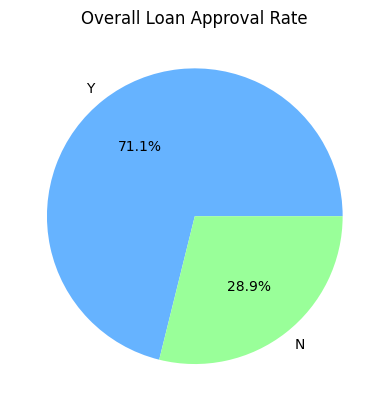

In [14]:
# Overall approval rate
approval_counts = df['Loan_Status'].value_counts()
plt.pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Overall Loan Approval Rate')
plt.show()

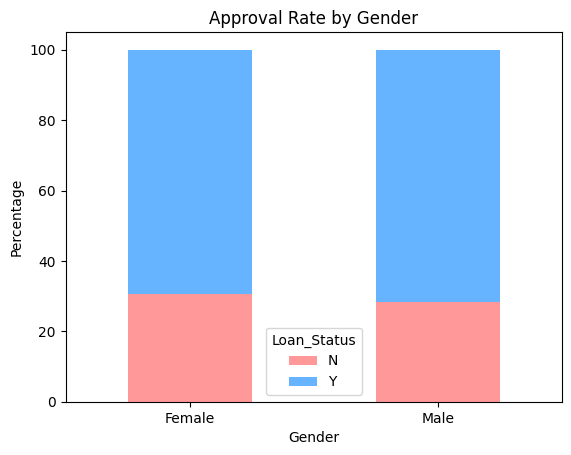

In [15]:
# Approval by Gender
gender_approval = pd.crosstab(df['Gender'], df['Loan_Status'], normalize='index') * 100
gender_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

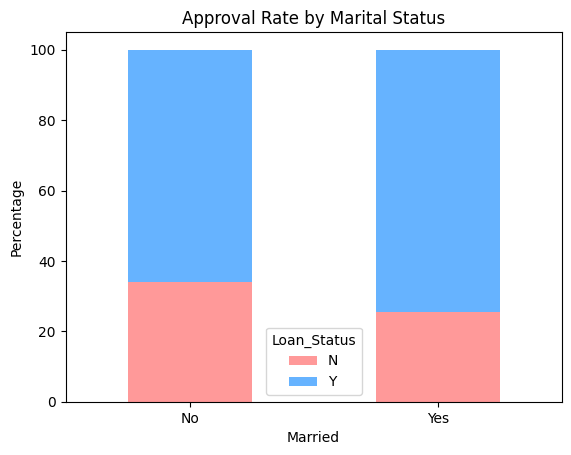

In [16]:
# Approval by Marital Status
married_approval = pd.crosstab(df['Married'], df['Loan_Status'], normalize='index') * 100
married_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

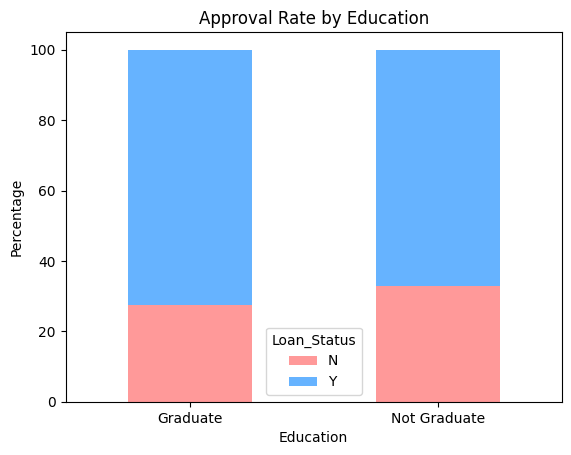

In [17]:
# Approval by Education
edu_approval = pd.crosstab(df['Education'], df['Loan_Status'], normalize='index') * 100
edu_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Education')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

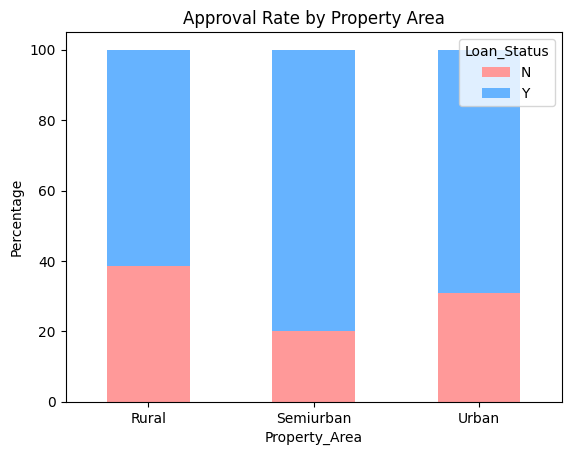

In [18]:
# Approval by Property Area
property_approval = pd.crosstab(df['Property_Area'], df['Loan_Status'], normalize='index') * 100
property_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Property Area')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

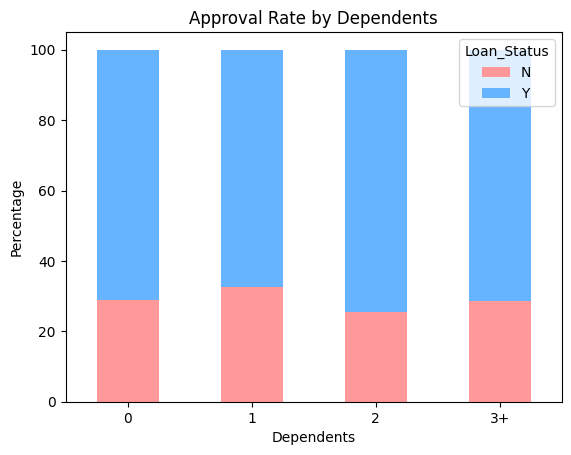

In [19]:

dependents_approval = pd.crosstab(df['Dependents'], df['Loan_Status'], normalize='index') * 100
dependents_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Dependents')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


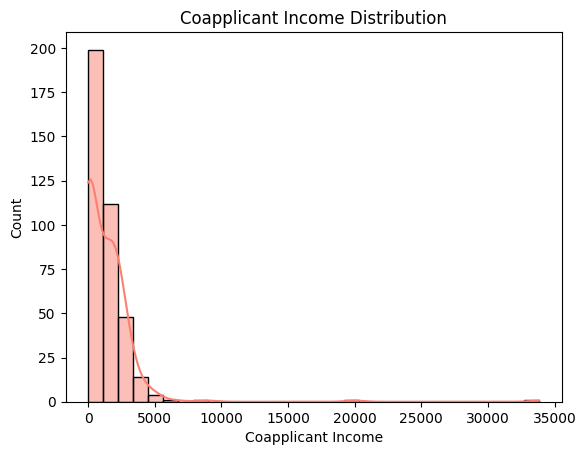

In [20]:
# Coapplicant Income Distribution
sns.histplot(df['CoapplicantIncome'], bins=30, kde=True, color='salmon')
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.show()

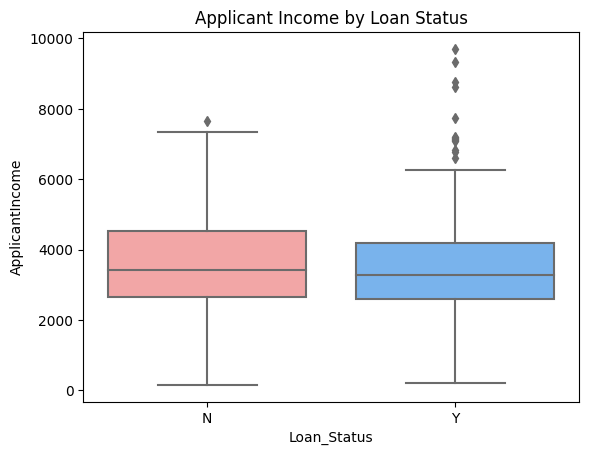

In [21]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Applicant Income by Loan Status')
plt.show()


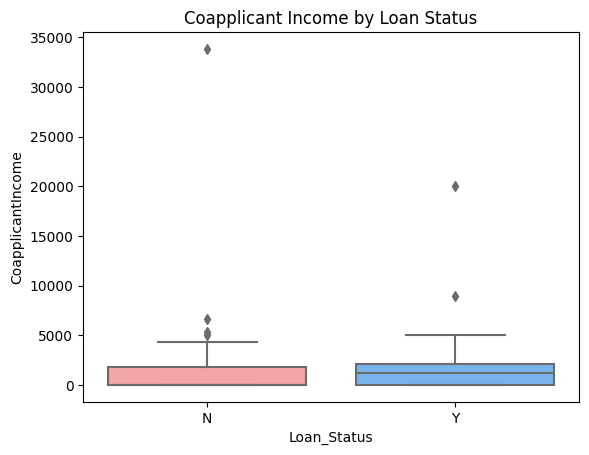

In [22]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Coapplicant Income by Loan Status')
plt.show()

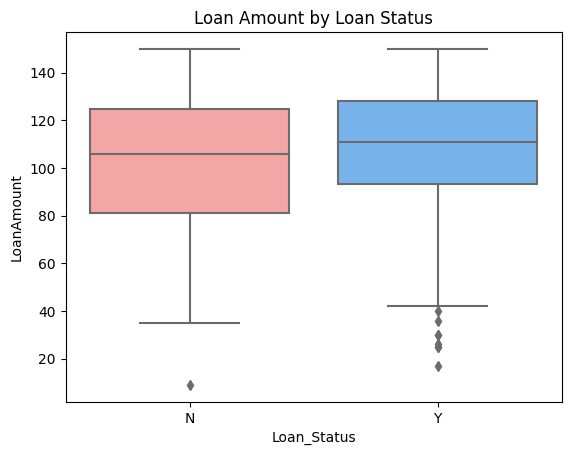

In [23]:
# Loan Amount vs Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Loan Amount by Loan Status')
plt.show()

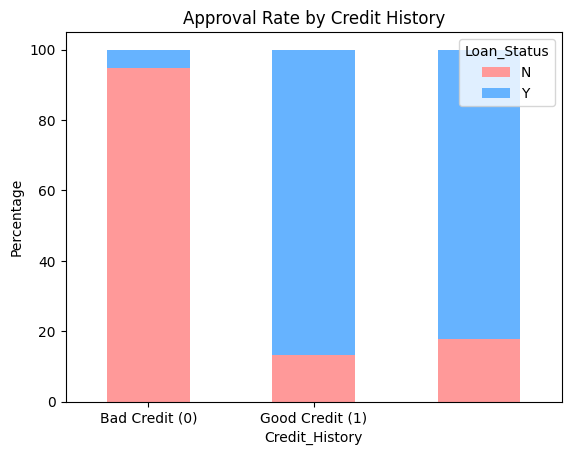

In [24]:
# Credit History vs Loan Status
credit_approval = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100
credit_approval.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Approval Rate by Credit History')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Bad Credit (0)', 'Good Credit (1)'], rotation=0)
plt.show()

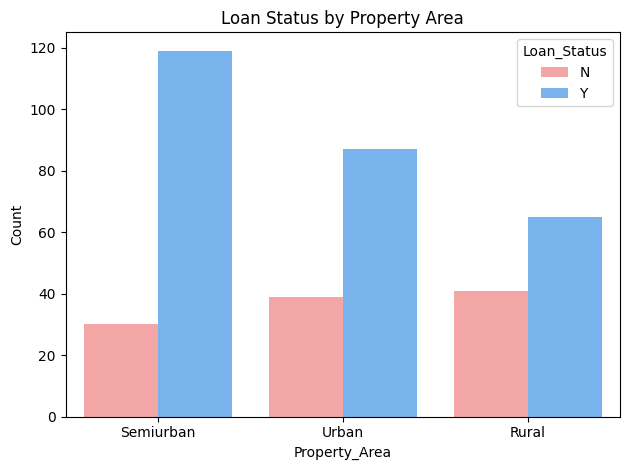

In [25]:
# Property Area vs Loan Status
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, 
              palette=['#ff9999','#66b3ff'], order=df['Property_Area'].value_counts().index)
plt.title('Loan Status by Property Area')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

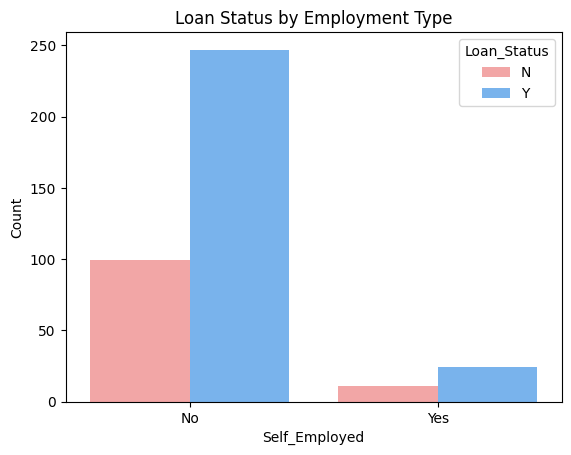

In [26]:
# Employment vs Loan Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Loan Status by Employment Type')
plt.ylabel('Count')

plt.show()

# *Data formating*

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [28]:
df['Loan_ID'].nunique()

381

In [29]:
df.drop(['Loan_ID','Property_Area'],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 32.9+ KB


In [31]:
df['Dependents'].value_counts()

Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64

# *Data Preprocessings*

In [32]:
# Encoding
encoding={
    'Gender': {'Male':1 , 'Female': 0}, 
    'Married': {'Yes': 1, 'No': 0},
    'Dependents': {'0':0, '1':1, '2': 2, '3+': 4},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}

In [33]:

df.replace(encoding, inplace=True)

/tmp/ipykernel_13/90793572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 32.9 KB


In [36]:
# Outliers 
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Gender                  0.0
Married                 1.0
Dependents              1.0
Education               1.0
Self_Employed           0.0
ApplicantIncome      1688.0
CoapplicantIncome    2016.0
LoanAmount             37.0
Loan_Amount_Term        0.0
Credit_History          0.0
Loan_Status             1.0
dtype: float64


In [37]:
# Removing Outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[~((df<lower_bound)| (df>upper_bound)).any(axis=1)]
print('Num of Rows after removing outliers :',df.shape[0])

Num of Rows after removing outliers : 155


In [38]:
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [40]:
# print shapes of the datasets
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {Y_train.shape}')
print(f'Shape of Y_Test {Y_test.shape}')

Shape of X_Train (108, 10)
Shape of X_Test (47, 10)
Shape of Y_Train (108,)
Shape of Y_Test (47,)


# *Modelling*

In [41]:
models_list=[
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    XGBClassifier(),
]

In [42]:
model_hyperparameters={
   'logistic' :{
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 200, 500]
   },
   
   'dt' : {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
   },
   
   'knn' : {
    'n_neighbors': [3, 5, 7, 9, 11, 13]
   },
   
   'rf' : {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
   },
   
   'gb' : {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
   },

    'bagging' : {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
   },
   
   'xgb' : {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
   },

}

In [43]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['logistic', 'dt', 'knn', 'rf', 'gb', 'bagging', 'xgb']


In [44]:

model_hyperparameters[model_keys[0]]

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [1000, 200, 500]}

In [45]:
import pickle
def ModelSelection(list_of_models, hyperparameters_dictionary):
    result = []
    best_score = 0
    best_model = None
    best_model_name = ""
    
    for i, model in enumerate(list_of_models):
        key = model_keys[i]
        params = hyperparameters_dictionary[key]
        print(f"Training {key}...")
        classifier = GridSearchCV(model, params, cv=5, n_jobs=-1)
        classifier.fit(X, Y)

        score = classifier.best_score_
        result.append({
            'model': key,
            'highest score': score,
            'best hyperparameters': classifier.best_params_
        })

        if score > best_score:
            best_score = score
            best_model = classifier.best_estimator_
            best_model_name = key

    
    
    with open(f'best_model_{best_model_name}.pkl', 'wb') as f:
        pickle.dump(best_model, f)

    print(f"\nBest model: {best_model_name}")
    print(f"Score: {best_score}")
    print(f"Saved as: best_model_{best_model_name}.pkl")

    result_dataframe = pd.DataFrame(result, columns=['model', 'highest score', 'best hyperparameters'])
    return result_dataframe

In [46]:
ModelSelection(models_list, model_hyperparameters)

Training logistic...
Training dt...
Training knn...
Training rf...
Training gb...
Training bagging...
Training xgb...

Best model: bagging
Score: 0.864516129032258
Saved as: best_model_bagging.pkl


,model,highest score,best hyperparameters
0,logistic,0.858065,"{'C': 0.001, 'max_iter': 1000}"
1,dt,0.832258,"{'criterion': 'entropy', 'max_depth': 5}"
2,knn,0.858065,{'n_neighbors': 7}
3,rf,0.845161,"{'max_depth': None, 'n_estimators': 200}"
4,gb,0.858065,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
5,bagging,0.864516,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e..."
6,xgb,0.858065,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."


In [47]:
with open('best_model_bagging.pkl', 'rb') as f:
    model = pickle.load(f)

In [48]:
y_pre=model.predict(X_test)
print('Accuracy_Score =',round((accuracy_score(Y_test,y_pre)*100),2),'%')
print('----------------------------------------------------')
print('confusion_matrix\n',confusion_matrix(Y_test,y_pre))
print('----------------------------------------------------')
print('classification_report\n',classification_report(Y_test,y_pre))

Accuracy_Score = 91.49 %
----------------------------------------------------
confusion_matrix
 [[ 1  4]
 [ 0 42]]
----------------------------------------------------
classification_report
               precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.91      1.00      0.95        42

    accuracy                           0.91        47
   macro avg       0.96      0.60      0.64        47
weighted avg       0.92      0.91      0.89        47

